In [1]:
#import matplotlib.pyplot as plt
import math
from RSSmodel import *
import numpy as np
from matplotlib import pyplot as plt
import random

In [2]:
env = RssEnv()

### 测试

测试Env类所有公开方法。

In [3]:
actionspace = [env.action_space_sample() for x in range(10)]
actionspace

[2, 0, 1, 2, 2, 2, 1, 2, 0, 2]

In [4]:
epoch_num = 0
for each in range(100):
    env = RssEnv()
    s1,r1 = env.step(0)
    s2,r2 = env.step(1)
    s3,r3 = env.step(2)
    print('the epoch {} winner is {}'.format(epoch_num, np.argmax([r1,r2,r3])))
    print('直接传输 状态{}，效用{}'.format(s1,r1))
    print('中继1传输 状态{}，效用{}'.format(s2,r2))
    print('中继2传输 状态{}，效用{}'.format(s3,r3))
    epoch_num += 1

Ps*g3/delta**2 => 0.1 * 0.20022143789835364 / 0.1**2
Ps*g3/delta**2 => 0.1 * 0.20022143789835364 / 0.1**2
Pr*g2/delta**2 => 0.04 * 0.05773370955509808 / 0.1**2
Ps*g3/delta**2 => 0.1 * 0.20022143789835364 / 0.1**2
Pr*g2/delta**2 => 0.06 * 0.17461345914584767 / 0.1**2
the epoch 0 winner is 0
直接传输 状态(0.20022143789835364, 0, 0.26330060407174116)，效用-1.334458918248775
中继1传输 状态(0.20022143789835364, 0.02309348382203923, 0.1377537435661183)，效用-2.002287654794843
中继2传输 状态(0.20022143789835364, 0.10476807548750859, 0.1366860029303214)，效用-2.000068933103921
Ps*g3/delta**2 => 0.1 * 0.20512197357173292 / 0.1**2
Ps*g3/delta**2 => 0.1 * 0.20512197357173292 / 0.1**2
Pr*g2/delta**2 => 0.06 * 0.3598406487940056 / 0.1**2
Ps*g3/delta**2 => 0.1 * 0.20512197357173292 / 0.1**2
Pr*g2/delta**2 => 0.04 * 0.01088088755275451 / 0.1**2
the epoch 1 winner is 0
直接传输 状态(0.20512197357173292, 0, 0.2691791728133536)，效用-1.3123780511683105
中继1传输 状态(0.20512197357173292, 0.21590438927640335, 0.1801645267150745)，效用-1.73388480826

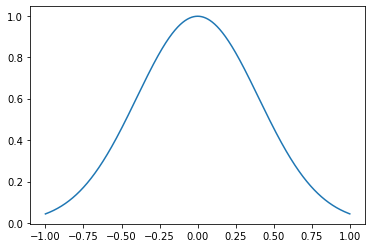

In [5]:
y = [env._g_channel_gain(x) for x in np.arange(-1,1, 0.001) ]
plt.plot(np.arange(-1,1,0.001), y)

In [18]:
def fun1(x, y):
    g1 = g_channel_gain(x)
    g2 = g_channel_gain(y)
    return 0.1*0.06*g1*g2 / (0.1*(0.1*g1 + 0.06*g2 )+ 0.01)

In [22]:
def g_channel_gain(x):
        mu = 0
        sigma2 = 0.16
        y = 1.0/np.sqrt(2*math.pi*sigma2) * np.exp(-(x-mu)**2 /(2*sigma2))
        #a = np.random.normal(mu, sigma2**0.5)
        return y

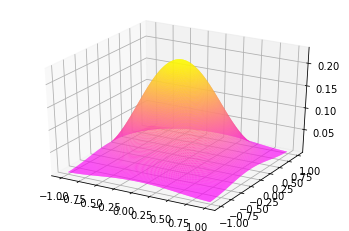

In [23]:
x =  np.arange(-1,1,0.01)
y = np.arange(-1,1,0.01)
x,y = np.meshgrid(x,y)
#z = 
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, fun1(x,y), rstride=1,cstride=1,cmap=plt.cm.spring)